# Visualize the object detection for supplmental materials

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

import glob
import sys

ModuleNotFoundError: No module named 'pandas'

In [12]:
# Overall set up
ROOTFOLDER = "/lustre1/g/geog_pyloo/05_timemachine"
PATH_PATH = "{ROOTFOLDER}/GSV/gsv_rgb/{cityabbr}/gsvmeta/gsv_path.csv"
CURATED_FOLDER = f"{ROOTFOLDER}/_curated"
TRANSFOM_FOLDER = f"{ROOTFOLDER}/_transformed"
OBJECT_SOURCE_FOLDER = "{CURATED_FOLDER}/{city_abbr}/*_objects.parquet"
GRAPHICS_FOLDER = f"{CURATED_FOLDER}/graphics"
GRAPHICS_PATH = "{GRAPHICS_FOLDER}/{city_abbr}.png"
if not os.path.exists(GRAPHICS_FOLDER):
    os.makedirs(GRAPHICS_FOLDER)

PATH_SEL = "{PATH_TRANSFOM_FOLDER}/{city_abbr}.csv"
OBJECT_LS = [
    "person",
    "car",
    "truck",
    "bus",
    "bicycle",
    "motorcycle",
    "van",
]
COLORS = {
    "person": "pink",
    "car": "blue",
    "truck": "red",
    "bus": "green",
    "bicycle": "purple",
    "motorcycle": "orange",
    "van": "yellow",
}

In [9]:
def get_city_path(city, object_list):
    """Get the path of the images with at least one person in the city"""
    cityabbr = city.replace(" ", "").lower()
    df_path = pd.read_csv(PATH_PATH.format(ROOTFOLDER=ROOTFOLDER, cityabbr=cityabbr))
    objfiles = glob.glob(OBJECT_SOURCE_FOLDER.format(CURATED_FOLDER=CURATED_FOLDER, city_abbr=cityabbr))
    df = pd.concat([pd.read_parquet(f) for f in objfiles])

    df_path['img'] = df_path['path'].apply(lambda x: x.split("/")[-1])
    # df_path_sel = df[df['object_name'].isin(object_list)].merge(df_path, on='img')
    # get the image with most number of car and person in one frame
    df = df[df['object_name'].isin(OBJECT_LS)].reset_index(drop=True)

    df_summary = df.groupby(["img","object_name"]).size().reset_index().rename(columns={0: "count"})
    df_summary_sel = df_summary[df_summary['count']>2].sort_values("count", ascending=True).groupby('object_name').head(2)
    df_path_sel = df_summary_sel.merge(df_path, on='img')
    return df_path_sel, df

In [19]:
# def visualize_image(df_path_sel, i):
#     """Visualize the image"""
#     img = df_path_sel.iloc[i]['path']
#     img_name = img.split("/")[-1]
#     object_name = df_path_sel.iloc[i]['object_name']
#     detection = df[(df['img'] == img_name)&(df['object_name'] == object_name)].reset_index(drop=True)
#     print(img_name)
#     print(object_name)
#     # draw a bounding box using the detection results
#     img = plt.imread(img)
#     fig, ax = plt.subplots()
#     ax.imshow(img)
#     for i in range(detection.shape[0]):
#         # the results are x1, y1, x2, y2
#         x1, y1, x2, y2 = detection.iloc[i][['x1', 'y1', 'x2', 'y2']]
#         x, y = x1, y1
#         w, h = x2 - x1, y2 - y1
#         rect = plt.Rectangle((x, y), w, h, linewidth=1, edgecolor=COLORS[object_name], facecolor='none')
#         ax.add_patch(rect)
#         # remove the axis
#         ax.axis('off')
#     plt.show()
    
def visualize_all_images(df_path_sel, df, cityabbr):
    df_path_sel = df_path_sel.sort_values("object_name")
    n_obj = df_path_sel['object_name'].nunique()
    fig, axes = plt.subplots(2, n_obj, figsize=(10,4))
    for j, obj in enumerate(OBJECT_LS):
        df_path_sel_obj = df_path_sel[df_path_sel['object_name'] == obj].reset_index(drop=True)
        for i in range(df_path_sel_obj.shape[0]):
            img = plt.imread(df_path_sel_obj.iloc[i]['path'])
            axes[i,j].set_title(obj)
            axes[i, j].imshow(img)
            detection = df[(df['img'] == df_path_sel_obj.iloc[i]['img'])&(df['object_name'] == obj)].reset_index(drop=True)
            for k in range(detection.shape[0]):
                x1, y1, x2, y2 = detection.iloc[k][['x1', 'y1', 'x2', 'y2']]
                x, y = x1, y1
                w, h = x2 - x1, y2 - y1
                rect = plt.Rectangle((x, y), w, h, linewidth=1, edgecolor=COLORS[obj], facecolor='none')
                axes[i, j].add_patch(rect)
            axes[i, j].axis('off')
    fig.tight_layout()
    fig.savefig(GRAPHICS_PATH.format(GRAPHICS_FOLDER=GRAPHICS_FOLDER, city_abbr=cityabbr), dpi=150)
    plt.show()
    

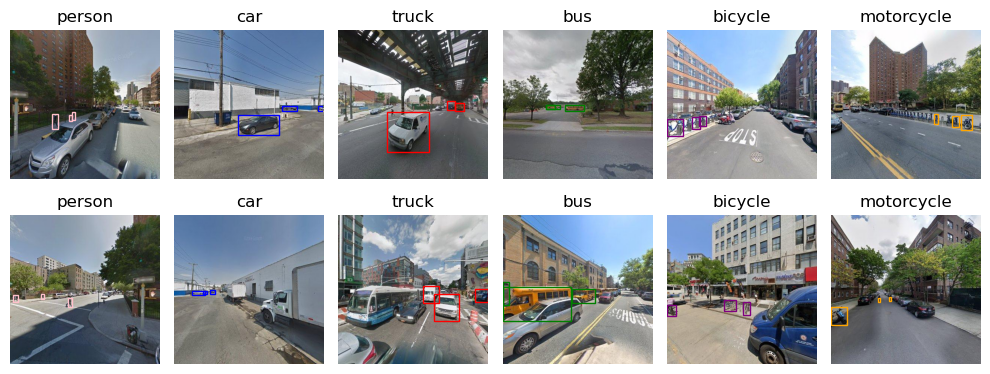

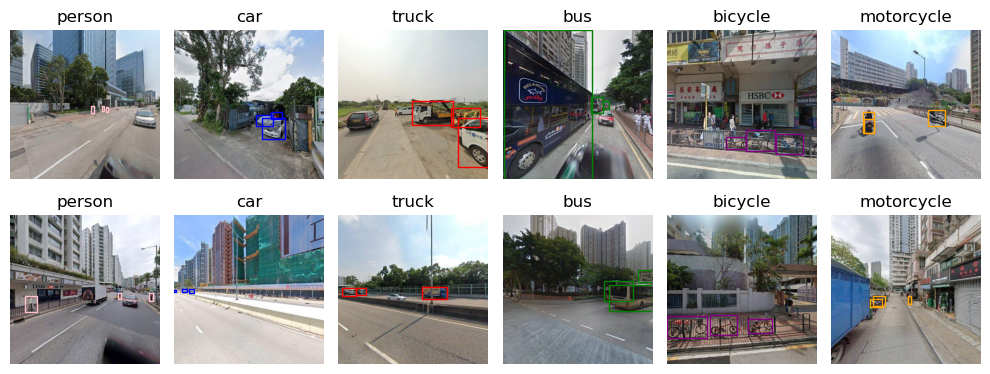

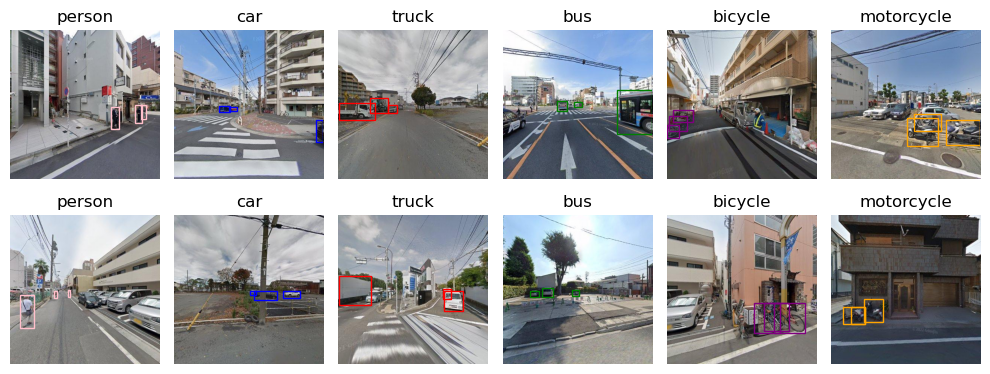

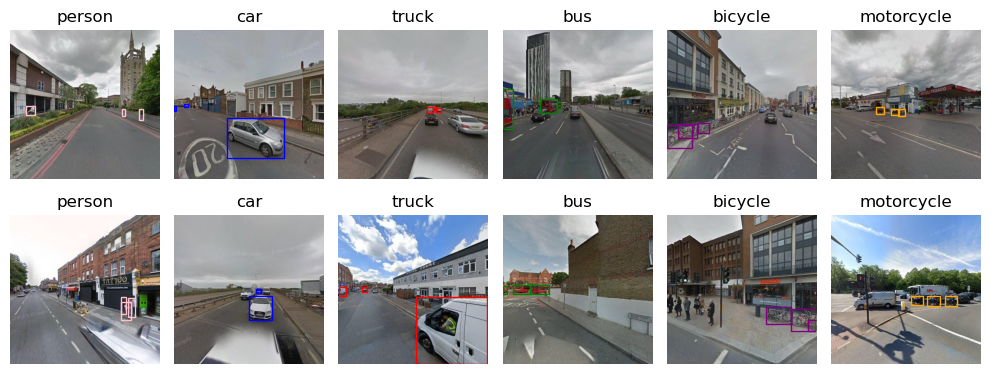

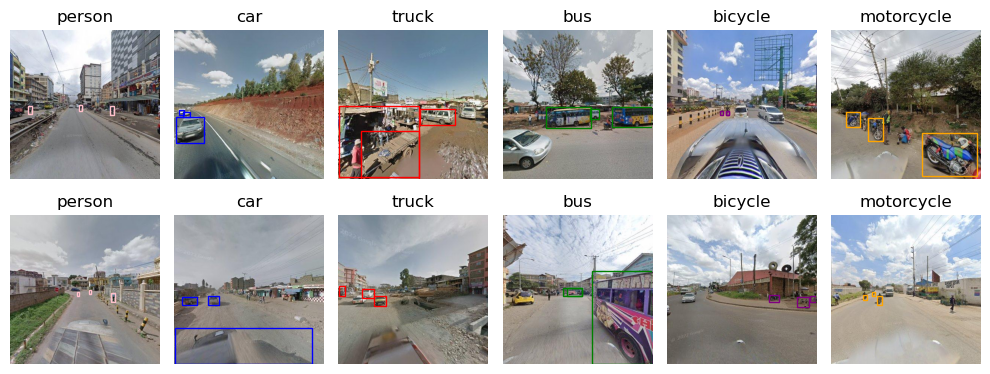

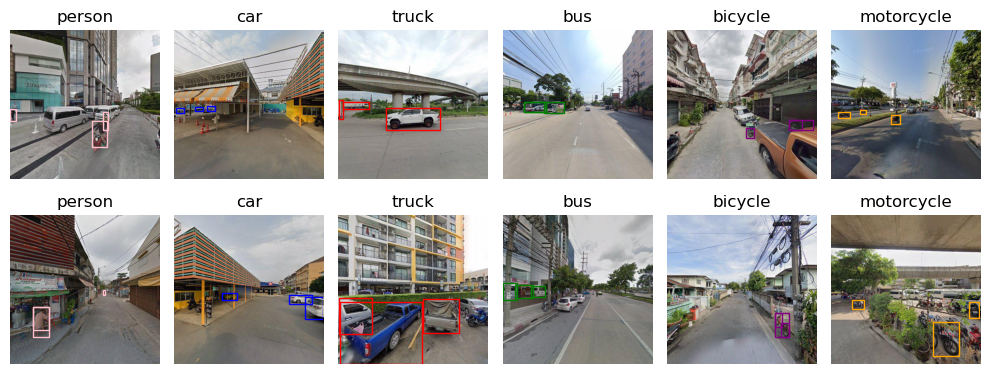

In [20]:

for sample_city in ["New York", "Hong Kong", "Tokyo","London", "Nairobi", "Bangkok"]:
    df_path_sel, df = get_city_path(sample_city, OBJECT_LS)
    visualize_all_images(df_path_sel, df, cityabbr=sample_city.lower().replace(" ", ""))


In [ ]:
sample_city = "Paris"
df_path = get_city_path(sample_city, OBJECT_LS)
visualize_all_images(df_path_sel, cityabbr = sample_city.lower().replace(" ", ""))